In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
# model.inertia_

In [9]:
# wcss = []
# for i in range(1, 11):
#     model = KMeans(n_clusters=i)
#     y_kmeans = model.fit_predict(x)
#     wcss.append(model.inertia_)

In [10]:
# plt.plot(range(1, 11), wcss)
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.title('Elbow Method')
# plt.show()

### Create mock farm data

In [11]:
# farm = pd.read_csv(r"./farms.csv")
# farm.head()

In [12]:
# farm['IND_PERIOD'].unique()

In [13]:
# farm = farm.loc[farm['IND_PERIOD'] == 'moderne tijd']

In [14]:
# farm['manure_t'] = np.random.randint(100, 10000, size=len(farm))

In [15]:
# 'According to the methane production yield from cattle manure, it can be obtained that 1 kg of volatile solid can generate 0.39 m3 of biogas and 0.22 m3 of methane.' 
# - need to find more accurate data here
# farm['biogas_potential_m3'] = farm['manure_t'] * 1000 * 0.39

In [16]:
# farm[['x', 'y', 'manure_t', 'biogas_potential_m3']].to_csv('farm_mock.csv')

### K-means Clustering

In [93]:
# Load your farm dataset (replace 'farm_data.csv' with your dataset file)
farm = pd.read_csv(r'./farm_mock.csv')

In [94]:
# define variables 
K = 5

In [95]:
model = KMeans(n_clusters=K)
y_kmeans = model.fit_predict(farm[['x', 'y']])

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [103]:
model.cluster_centers_

array([[ 6.55493723, 52.2548949 ],
       [ 6.87068558, 52.21519015],
       [ 6.66410529, 52.39262208],
       [ 6.73051788, 52.25288489],
       [ 6.91423443, 52.38740122]])

In [114]:
# Print the cluster centers and count of farms in each cluster
cluster_centers = model.cluster_centers_
cluster_df = pd.DataFrame(cluster_centers, columns=['x', 'y'])
cluster_df['count'] = np.bincount(y_kmeans)
cluster_df

,x,y,count
0,6.554937,52.254895,25
1,6.870686,52.215190,25
2,6.664105,52.392622,32
3,6.730518,52.252885,42
4,6.914234,52.387401,18


In [116]:
# Save the clustered dataset to a new CSV file
cluster_df.to_csv(r'./farm_cluster_mock_5.csv', index=False)

In [96]:
farm['cluster'] = y_kmeans
farm.head()

,Unnamed: 0,x,y,manure_t,biogas_potential_m3,cluster
0,0,6.765843,52.314139,7431,2898090.0,3
1,1,6.837249,52.425084,7246,2825940.0,4
2,2,6.859361,52.386225,9639,3759210.0,4
3,3,6.753483,52.434382,9821,3830190.0,2
4,4,6.484077,52.243620,2732,1065480.0,0


<Axes: xlabel='x', ylabel='y'>

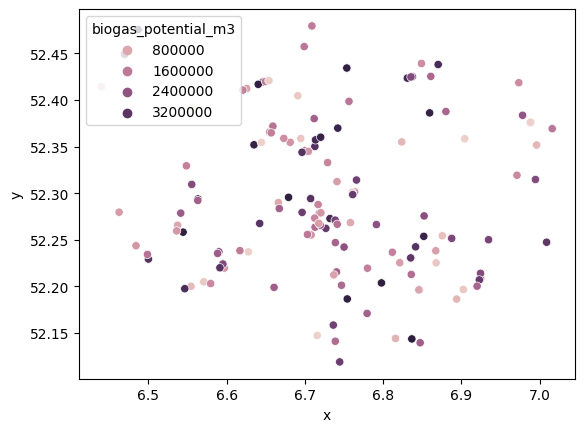

In [97]:
sns.scatterplot(data = farm, x = 'x', y = 'y', hue = 'biogas_potential_m3')

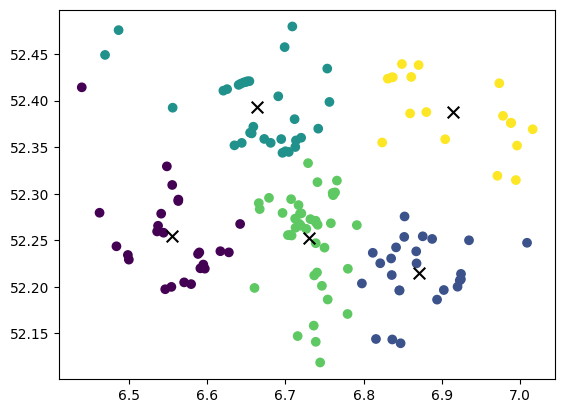

In [115]:
plt.scatter(farm['x'], farm['y'], c=farm['cluster'])
plt.scatter(cluster_df['x'], cluster_df['y'], c='black', marker='x', s=70, label='Cluster Centers')

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(farm[['y', 'x']], farm[['biogas_potential_m3']], test_size=0.33, random_state=0)
print(X_train, X_test, y_train, y_test)

             y         x
123  52.255643  6.703254
59   52.278634  6.541253
124  52.262299  6.726691
129  52.343932  6.696257
110  52.420778  6.651290
..         ...       ...
9    52.358521  6.904209
103  52.423572  6.830819
67   52.344876  6.704342
117  52.439261  6.848897
47   52.475655  6.486836

[95 rows x 2 columns]              y         x
45   52.225288  6.867595
68   52.358695  6.694662
16   52.225407  6.821180
56   52.279628  6.462510
22   52.418634  6.973299
7    52.259562  6.536057
107  52.404628  6.690877
140  52.287837  6.716810
86   52.200232  6.920002
100  52.293753  6.563224
93   52.242184  6.749962
126  52.278634  6.718668
8    52.229306  6.499941
98   52.235362  6.588357
139  52.237078  6.627751
33   52.314705  6.994540
83   52.212767  6.835895
84   52.242442  6.841402
114  52.420848  6.653968
24   52.272772  6.731965
63   52.357240  6.713485
85   52.196675  6.902460
60   52.224009  6.595124
26   52.266337  6.791289
62   52.350189  6.712647
18   52.253702  6.851862
73

In [25]:
from sklearn import preprocessing

# X_train_norm = preprocessing.normalize(X_train)
# X_test_norm = preprocessing.normalize(X_test)
x_norm = preprocessing.normalize(farm[['x', 'y', 'biogas_potential_m3']])

In [26]:
model = KMeans(n_clusters=K)
y_kmeans = model.fit_predict(farm[['biogas_potential_m3']])
farm['cluster_1'] = y_kmeans

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


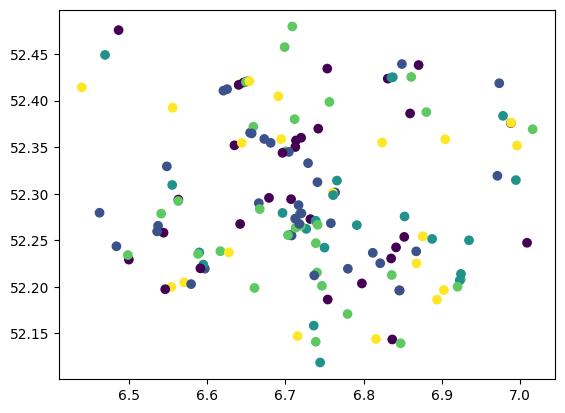

In [27]:
plt.scatter(farm['x'], farm['y'], c=farm['cluster_1'])

In [28]:
model = KMeans(n_clusters=K)
y_kmeans = model.fit_predict(farm[['x', 'y', 'biogas_potential_m3']])
farm['cluster_2'] = y_kmeans

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


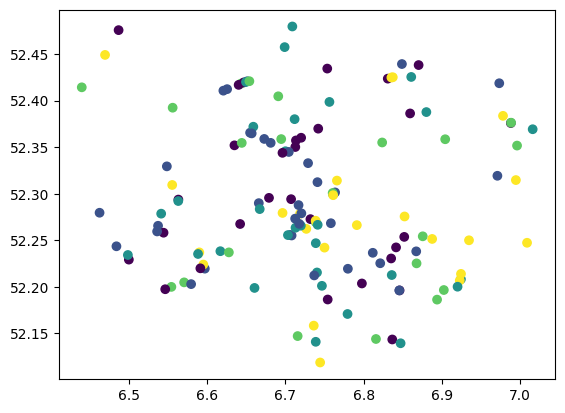

In [29]:
plt.scatter(farm['x'], farm['y'], c=farm['cluster_2'])

In [30]:
model = KMeans(n_clusters=K)
y_kmeans = model.fit_predict(x_norm)
farm['cluster_3'] = y_kmeans

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


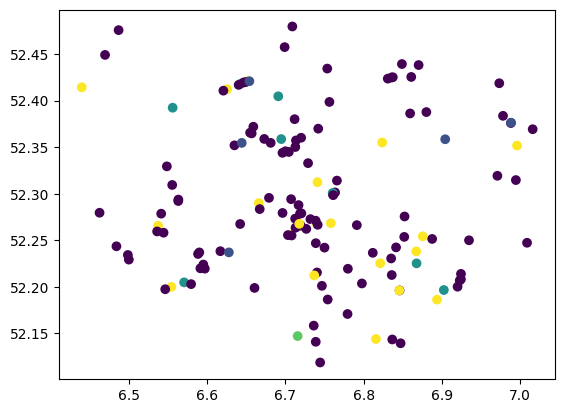

In [31]:
plt.scatter(farm['x'], farm['y'], c=farm['cluster_3'])

In [32]:
# Select the features for clustering (latitude, longitude, manure production)
X = farm[['y', 'x', 'biogas_potential_m3']]

# Standardize the data to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


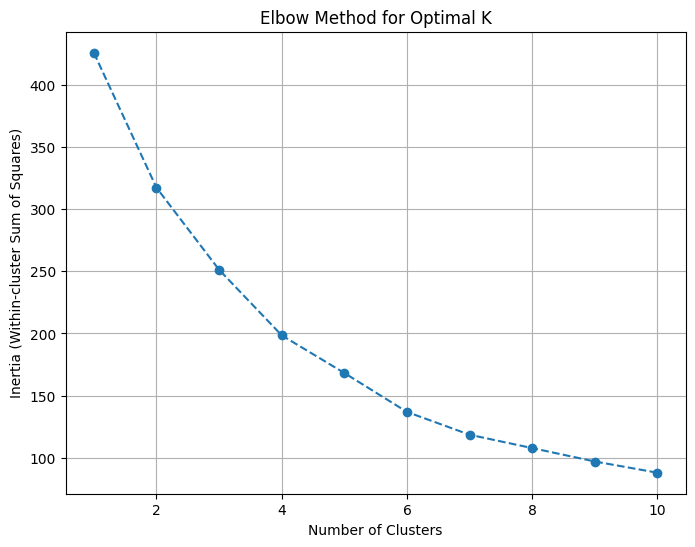

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [35]:
# Based on the Elbow method, choose an appropriate number of clusters (e.g., 3)
k = 6

In [36]:
# Perform K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original farmset
farm['cluster'] = clusters

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
farm.head()

,Unnamed: 0,x,y,manure_t,biogas_potential_m3,cluster,cluster_1,cluster_2,cluster_3
0,0,6.765843,52.314139,7431,2898090.0,5,2,4,0
1,1,6.837249,52.425084,7246,2825940.0,5,2,4,0
2,2,6.859361,52.386225,9639,3759210.0,5,0,0,0
3,3,6.753483,52.434382,9821,3830190.0,5,0,0,0
4,4,6.484077,52.243620,2732,1065480.0,3,1,1,0


In [38]:
# Print the cluster centers and count of farms in each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=['lat', 'lon', 'biogas_potential'])
cluster_df['count'] = np.bincount(clusters)
print(cluster_df)

# Save the clustered dataset to a new CSV file
# data.to_csv('clustered_farm_farm.csv', index=False)

         lat       lon  biogas_potential  count
0  52.217461  6.832080      2.893069e+06     24
1  52.390531  6.661039      1.057053e+06     23
2  52.241400  6.763102      1.104814e+06     35
3  52.245312  6.562098      1.918953e+06     23
4  52.375030  6.940239      1.452600e+06     13
5  52.364274  6.708174      3.404928e+06     24


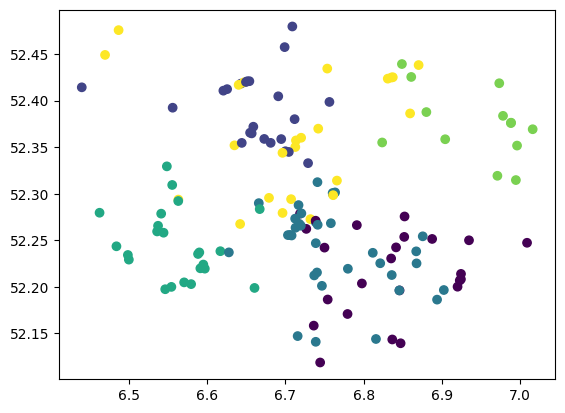

In [39]:
plt.scatter(farm['x'], farm['y'], c=farm['cluster'])

In [40]:
# Scale the marker size based on manure production to a reasonable range
max_marker_size = 1000  # Define the maximum marker size
min_manure = farm['manure_t'].min()
max_manure = farm['manure_t'].max()
farm['scaled_marker_size'] = max_marker_size * (farm['manure_t'] - min_manure) / (max_manure - min_manure)
farm

,Unnamed: 0,x,y,manure_t,biogas_potential_m3,cluster,cluster_1,cluster_2,cluster_3,scaled_marker_size
0,0,6.765843,52.314139,7431,2898090.0,5,2,4,0,739.628766
1,1,6.837249,52.425084,7246,2825940.0,5,2,4,0,720.864185
2,2,6.859361,52.386225,9639,3759210.0,5,0,0,0,963.586571
3,3,6.753483,52.434382,9821,3830190.0,5,0,0,0,982.046861
4,4,6.484077,52.243620,2732,1065480.0,3,1,1,0,263.008419
...,...,...,...,...,...,...,...,...,...,...
137,277,6.717715,52.267689,2368,923520.0,2,1,1,4,226.087839
138,278,6.642151,52.267548,8300,3237000.0,5,0,0,0,827.771579
139,279,6.627751,52.237078,254,99060.0,2,4,3,1,11.664469
140,280,6.716810,52.287837,3559,1388010.0,2,1,1,0,346.891165


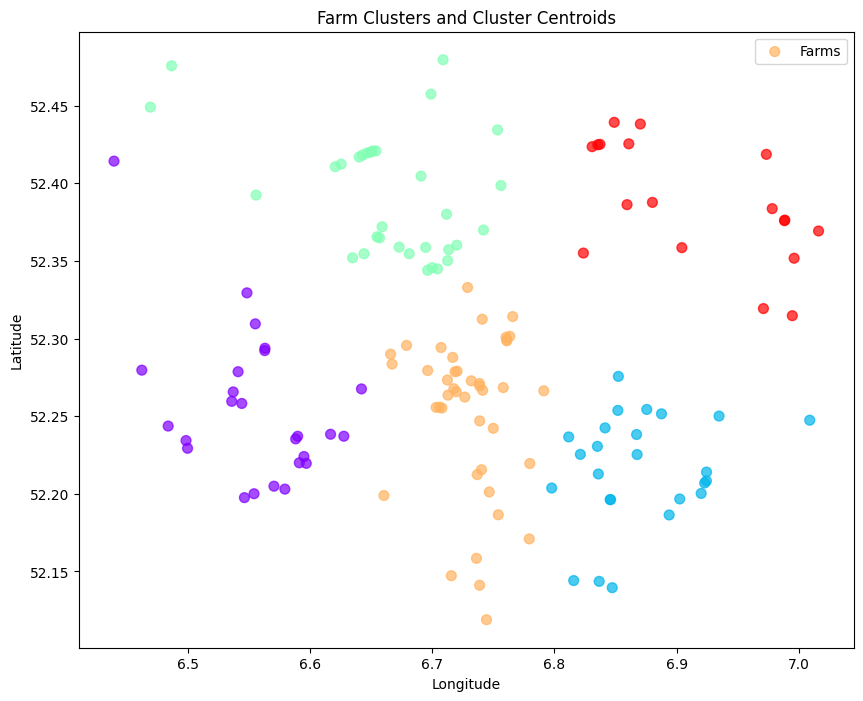

In [118]:
# Create a scatter plot of the farm farm with clusters
plt.figure(figsize=(10, 8))
# plt.scatter(farm['x'], farm['y'], c=farm['cluster'], cmap='rainbow', s=farm['scaled_marker_size'], alpha=0.7, label='Farms')
plt.scatter(farm['x'], farm['y'], c=farm['cluster'], cmap='rainbow', s=50, alpha=0.7, label='Farms')
# plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='black', marker='x', s=70, label='Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Farm Clusters and Cluster Centroids')
plt.legend()
# plt.savefig(r"./figure_1_cluster.png", dpi=300)
# plt.grid(True)
plt.show()

## Optimization Approach to Clustering

In [42]:
# Number of farms and clusters
num_farms = len(farm)
num_clusters = 6  # Adjust based on your choice of clusters

In [43]:
model = KMeans(n_clusters=num_clusters)
y_kmeans = model.fit_predict(farm[['x', 'y']])
farm['new_cluster'] = y_kmeans
farm.head()

/Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Unnamed: 0,x,y,manure_t,biogas_potential_m3,cluster,cluster_1,cluster_2,cluster_3,scaled_marker_size,new_cluster
0,0,6.765843,52.314139,7431,2898090.0,5,2,4,0,739.628766,5
1,1,6.837249,52.425084,7246,2825940.0,5,2,4,0,720.864185,2
2,2,6.859361,52.386225,9639,3759210.0,5,0,0,0,963.586571,2
3,3,6.753483,52.434382,9821,3830190.0,5,0,0,0,982.046861,1
4,4,6.484077,52.243620,2732,1065480.0,3,1,1,0,263.008419,0


In [44]:
# Calculate total manure production for each cluster
category_totals = farm.groupby("new_cluster")["manure_t"].sum().reset_index()
category_totals

,new_cluster,manure_t
0,0,120707
1,1,142988
2,2,90176
3,3,133706
4,4,18960
5,5,204110


In [45]:
# Create a list to store the total manure production for each category
total_manure_per_cluster = category_totals["manure_t"].tolist()

# Print or use total_manure_by_category as needed
print(total_manure_per_cluster)

[120707, 142988, 90176, 133706, 18960, 204110]


In [48]:
cluster_assignments = farm['new_cluster'].tolist()

In [49]:
len(cluster_assignments)

142

In [50]:
# plt.hist(data['manure_t'], bins=15)
# plt.show()

In [51]:
# Define the capacities of the digesters
medium_digester_capacity = 7848  # in tonne/yr
large_digester_capacity = 15056  # in tonne/yr

In [52]:
# from scipy.spatial import distance
# from scipy.optimize import linprog

In [53]:
# # Formulate the linear programming problem 
# # Variables: x[i, j] represents the amount of manure from farm i assigned to digester j
# c = np.array(data['manure_t'])  # Objective function coefficients (manure production)
# A_eq = np.zeros((num_clusters, num_farms))
# for i in range(num_clusters):
#     A_eq[i, cluster_assignments == i] = 1  # Constraints for cluster assignments
# b_eq = total_manure_per_cluster  # Right-hand side of the constraints

# # Capacity constraints
# bounds = [(0, None)] * (num_farms * num_clusters)  # Manure assignment >= 0
# for j in range(num_clusters):
#     bounds += [(0, medium_digester_capacity)]  # Medium digester capacity
#     bounds += [(0, large_digester_capacity)]  # Large digester capacity

# # Solve the linear programming problem
# result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# # Extract the solution
# manure_assignment = result.x[:num_farms * num_clusters].reshape(num_farms, num_clusters)

# # Print or use manure_assignment as needed to determine which digesters are assigned to each cluster
# print(manure_assignment)


## Method 2: Constrained Clustering

Another possibility is writing a def function, which continue to generate iteration of clusters, then each iteration is checked to see if all cluster fits within the digester capacity. Get the ones with the least amount of clusters but all are within the capacity limit. 

In [59]:
# import numpy as np
# from scipy.spatial.distance import pdist, squareform

# # Sample data - You should replace this with your actual data
# num_farms = 10
# cluster_capacity = 100  # Maximum cluster capacity (e.g., 100 tonnes)
# manure_production = {
#     1: 20,
#     2: 25,
#     3: 30,
#     4: 15,
#     5: 35,
#     6: 40,
#     7: 10,
#     8: 30,
#     9: 20,
#     10: 25,
# }

In [65]:

# from scipy.cluster.hierarchy import linkage, fcluster


# # Create a distance matrix based on manure production
# manure_array = np.array([manure_production[i] for i in range(1, num_farms + 1)])
# distance_matrix = squareform(pdist(manure_array[:, np.newaxis]))

# # Hierarchical clustering to minimize the number of clusters
# linkage_matrix = linkage(distance_matrix, method='single')  # You can adjust the linkage method as needed
# max_cluster_capacity = cluster_capacity
# cluster_assignments = fcluster(linkage_matrix, max_cluster_capacity, criterion='distance')

# # Print results
# num_clusters = np.max(cluster_assignments)
# print("Number of clusters:", num_clusters)

# print("Farm to Cluster Assignment:")
# for i, k in enumerate(cluster_assignments):
#     print(f"Farm {i + 1} -> Cluster {k}")


Number of clusters: 1
Farm to Cluster Assignment:
Farm 1 -> Cluster 1
Farm 2 -> Cluster 1
Farm 3 -> Cluster 1
Farm 4 -> Cluster 1
Farm 5 -> Cluster 1
Farm 6 -> Cluster 1
Farm 7 -> Cluster 1
Farm 8 -> Cluster 1
Farm 9 -> Cluster 1
Farm 10 -> Cluster 1


/var/folders/w_/w1t73xzx35j4jtrj94fjskj80000gn/T/ipykernel_9757/3671085365.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='single')  # You can adjust the linkage method as needed


In [74]:
import pulp
import random

In [75]:
# Define mock data
random.seed(0)  # Set a seed for reproducibility

# Farm locations (random coordinates)
farm_locations = {
    "Farm1": {"x": random.uniform(0, 10), "y": random.uniform(0, 10)},
    "Farm2": {"x": random.uniform(0, 10), "y": random.uniform(0, 10)},
    "Farm3": {"x": random.uniform(0, 10), "y": random.uniform(0, 10)},
    "Farm4": {"x": random.uniform(0, 10), "y": random.uniform(0, 10)},
    "Farm5": {"x": random.uniform(0, 10), "y": random.uniform(0, 10)},
}

# Manure production for each farm (random values)
for farm in farm_locations:
    farm_locations[farm]["ManureProduction"] = random.randint(300, 800)

# Potential biogas plant locations (random coordinates)
plant_locations = {
    "Plant1": {"x": random.uniform(0, 10), "y": random.uniform(0, 10)},
    "Plant2": {"x": random.uniform(0, 10), "y": random.uniform(0, 10)},
    "Plant3": {"x": random.uniform(0, 10), "y": random.uniform(0, 10)},
}

In [79]:
# Number of biogas plants to be opened
p = 3

# Calculate distances between farms and potential plant locations
def calculate_distance(coord1, coord2):
    return ((coord1["x"] - coord2["x"])**2 + (coord1["y"] - coord2["y"])**2)**0.5

distances = {
    (farm, plant): calculate_distance(farm_locations[farm], plant_locations[plant])
    for farm in farm_locations
    for plant in plant_locations
}

In [80]:
distances

{('Farm1', 'Plant1'): 9.676266428718373,
 ('Farm1', 'Plant2'): 2.33682318051497,
 ('Farm1', 'Plant3'): 3.162933812239556,
 ('Farm2', 'Plant1'): 3.25249655944719,
 ('Farm2', 'Plant2'): 8.209723789488512,
 ('Farm2', 'Plant3'): 4.600936804382105,
 ('Farm3', 'Plant1'): 4.839399271952395,
 ('Farm3', 'Plant2'): 6.497077336657946,
 ('Farm3', 'Plant3'): 3.0099193438845853,
 ('Farm4', 'Plant1'): 6.769554956999655,
 ('Farm4', 'Plant2'): 6.841244513620624,
 ('Farm4', 'Plant3'): 4.739304621414707,
 ('Farm5', 'Plant1'): 5.934231706309256,
 ('Farm5', 'Plant2'): 5.17030202117649,
 ('Farm5', 'Plant3'): 1.3403404670412797}

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/w_/w1t73xzx35j4jtrj94fjskj80000gn/T/680602144c324e0e932dab4309868466-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/w_/w1t73xzx35j4jtrj94fjskj80000gn/T/680602144c324e0e932dab4309868466-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 14 COLUMNS
At line 105 RHS
At line 115 BOUNDS
At line 131 ENDATA
Problem MODEL has 9 rows, 15 columns and 45 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02



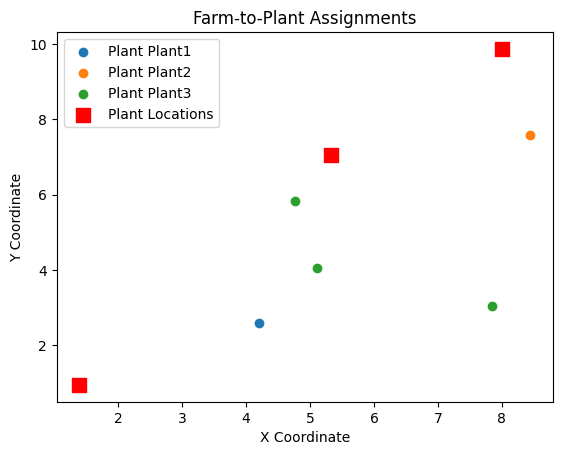

Total Cost = 14.678884172302732


In [88]:

# Create the LP problem
model = pulp.LpProblem("Capacitated_PMedian", pulp.LpMinimize)

# Create decision variables
x = pulp.LpVariable.dicts("Assignment", [(i, j) for i in farm_locations for j in plant_locations], cat=pulp.LpBinary)

# Objective function: Minimize total cost
model += pulp.lpSum(distances[i, j] * x[i, j] for i in farm_locations for j in plant_locations)

# Capacity constraint for each biogas plant
for j in plant_locations:
    model += pulp.lpSum(farm_locations[i]["ManureProduction"] * x[i, j] for i in farm_locations) <= 1000

# Assignment constraint: Each farm assigned to exactly one biogas plant
for i in farm_locations:
    model += pulp.lpSum(x[i, j] for j in plant_locations) == 1

# Number of biogas plants constraint
model += pulp.lpSum(x[i, j] for i in farm_locations for j in plant_locations) <= p

# Solve the problem
model.solve()

# Initialize lists to store assignment information
assigned_farms = {j: [] for j in plant_locations}

# Collect assigned farms
for i in farm_locations:
    for j in plant_locations:
        if x[i, j].varValue == 1:
            assigned_farms[j].append(i)

# Visualize the results
for j in plant_locations:
    assigned = assigned_farms[j]
    plt.scatter([farm_locations[i]["x"] for i in assigned], [farm_locations[i]["y"] for i in assigned], label=f"Plant {j}", marker='o')

plt.scatter([plant_locations[j]["x"] for j in plant_locations], [plant_locations[j]["y"] for j in plant_locations], color='red', label="Plant Locations", marker='s', s=100)

# Add labels and legend
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Farm-to-Plant Assignments")
plt.legend()

# Show the plot
plt.show()

# Total cost
print("Total Cost =", pulp.value(model.objective))


In [89]:
assigned_farms

{'Plant1': ['Farm2'],
 'Plant2': ['Farm1'],
 'Plant3': ['Farm3', 'Farm4', 'Farm5']}

In [85]:


# Define mock data
random.seed(0)  # Set a seed for reproducibility

# Number of farms and plants
num_farms = 5
num_plants = 3

# Create a distance matrix using random distances (for demonstration)
dist_matrix = np.random.uniform(0, 10, size=(num_farms, num_plants))

# Number of biogas plants to be opened
p = 3

# Manure production data for each farm
farm_production = [500, 650, 720, 550, 480]  # Manure production in kg for each of the 5 farms


# Create the LP problem
model = pulp.LpProblem("Capacitated_PMedian", pulp.LpMinimize)

# Create decision variables
x = pulp.LpVariable.dicts("Assignment", [(i, j) for i in range(num_farms) for j in range(num_plants)], cat=pulp.LpBinary)

# Objective function: Minimize total cost
model += pulp.lpSum(dist_matrix[i][j] * x[i, j] for i in range(num_farms) for j in range(num_plants))

# Capacity constraint for each biogas plant
for j in range(num_plants):
    model += pulp.lpSum(farm_production[i] * x[i, j] for i in range(num_farms)) <= 1500

# Number of biogas plants constraint
model += pulp.lpSum(x[i, j] for i in range(num_farms) for j in range(num_plants)) <= p

# Solve the problem
model.solve()

# Initialize lists to store assignment information
assigned_farms = {j: [] for j in range(num_plants)}

# Collect assigned farms
for i in range(num_farms):
    for j in range(num_plants):
        if x[i, j].varValue == 1:
            assigned_farms[j].append(i)

# Visualize the results (similar to previous code)
# ...

# Total cost
print("Total Cost =", pulp.value(model.objective))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/wenyuc/opt/anaconda3/envs/bioze_env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/w_/w1t73xzx35j4jtrj94fjskj80000gn/T/7351ae5e8226458c813cf3df8a73514a-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/w_/w1t73xzx35j4jtrj94fjskj80000gn/T/7351ae5e8226458c813cf3df8a73514a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 85 RHS
At line 90 BOUNDS
At line 106 ENDATA
Problem MODEL has 4 rows, 15 columns and 30 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 0 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 0 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 